In [ ]:
# Import necessary libraries
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression  

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score  
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


In [27]:
# Load the dataset
df = pd.read_csv('bankloans.csv')


In [29]:
# Display first 5 rows to understand the data structure
print("Dataset preview:")
df.head()

Dataset preview:


,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [4]:
df.value_counts()

age  ed  employ  address  income  debtinc  creddebt  othdebt    default
20   1   4       0        14      9.7      0.200984  1.157016   1.0        1
39   1   10      4        31      4.8      0.184512  1.303488   0.0        1
         0       8        39      7.9      1.066026  2.014974   0.0        1
         2       15       22      23.1     1.915914  3.166086   1.0        1
         4       9        38      6.5      1.178190  1.291810   0.0        1
                                                                          ..
30   2   8       4        56      6.4      0.333312  3.250688   0.0        1
         10      4        22      16.1     1.409716  2.132284   0.0        1
         12      9        68      20.1     2.856612  10.811388  0.0        1
                          98      7.2      2.935296  4.120704   0.0        1
56   1   11      20       59      15.0     4.672800  4.177200   0.0        1
Name: count, Length: 700, dtype: int64

In [30]:
# Check for missing values in the dataset
print("\nMissing values per column:")
df.isnull().sum()


Missing values per column:


age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [31]:
# Additional exploratory data analysis
print("\nDataset shape:", df.shape)
print("\nDataset information:")
df.info()


Dataset shape: (1150, 9)

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1150 non-null   int64  
 1   ed        1150 non-null   int64  
 2   employ    1150 non-null   int64  
 3   address   1150 non-null   int64  
 4   income    1150 non-null   int64  
 5   debtinc   1150 non-null   float64
 6   creddebt  1150 non-null   float64
 7   othdebt   1150 non-null   float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 81.0 KB


In [32]:
print("\nStatistical summary:")
df.describe()



Statistical summary:


,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,700.000000
mean,35.235652,1.695652,8.781739,8.485217,47.982609,10.063391,1.605111,3.103844,0.261429
std,8.089961,0.927051,6.914762,6.977725,40.508814,6.584288,2.135967,3.529273,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.200000,0.415584,1.047996,0.000000
50%,35.000000,1.000000,7.000000,7.000000,36.000000,8.750000,0.899130,2.038053,0.000000
75%,41.000000,2.000000,13.000000,12.000000,56.750000,13.600000,1.898820,3.864960,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [ ]:
# Remove rows with missing values
df = df.dropna()
print(f"Dataset shape after removing nulls: {df.shape}")

Dataset shape after removing nulls: (700, 9)


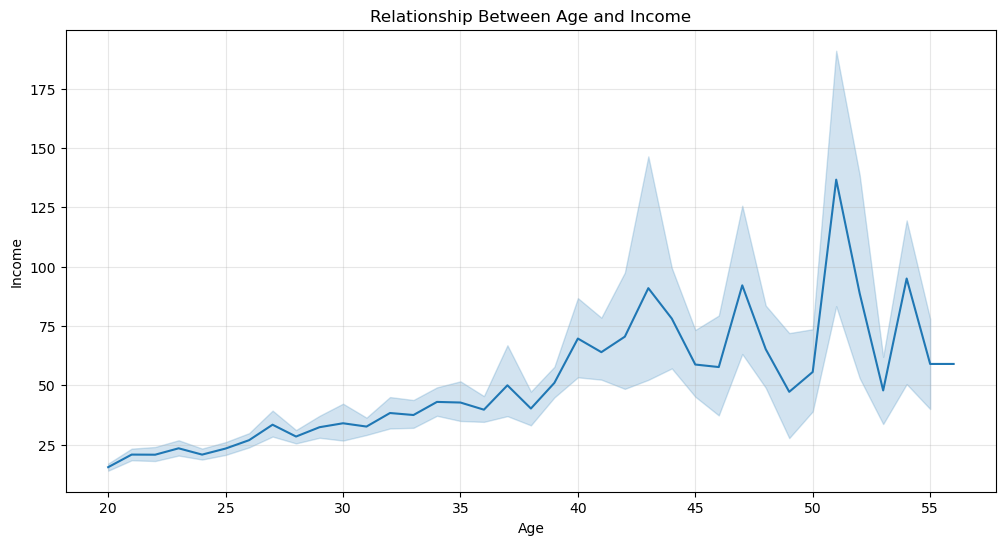

In [34]:
# Visualize relationship between age and income
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x='age', y='income', data=df, ax=ax)
plt.title('Relationship Between Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(True, alpha=0.3)

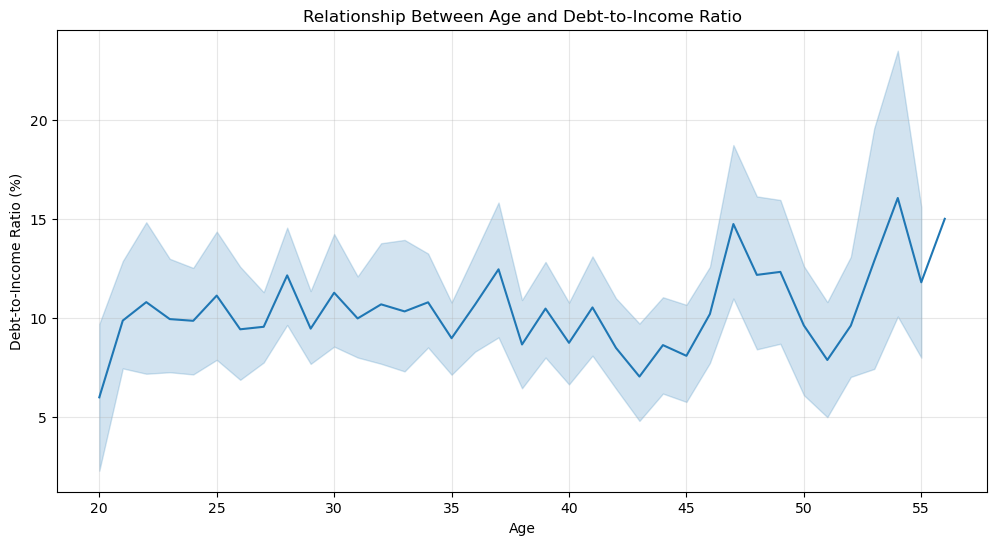

In [35]:
# Visualize relationship between age and debt-to-income ratio
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x='age', y='debtinc', data=df, ax=ax)
plt.title('Relationship Between Age and Debt-to-Income Ratio')
plt.xlabel('Age')
plt.ylabel('Debt-to-Income Ratio (%)')
plt.grid(True, alpha=0.3)

In [36]:
# Check class distribution (target variable)
default_counts = df['default'].value_counts()
print("Default distribution:")
print(default_counts)
print(f"Default rate: {default_counts[1]/len(df)*100:.2f}%")

Default distribution:
default
0.0    517
1.0    183
Name: count, dtype: int64
Default rate: 26.14%


Text(0, 0.5, 'Count')

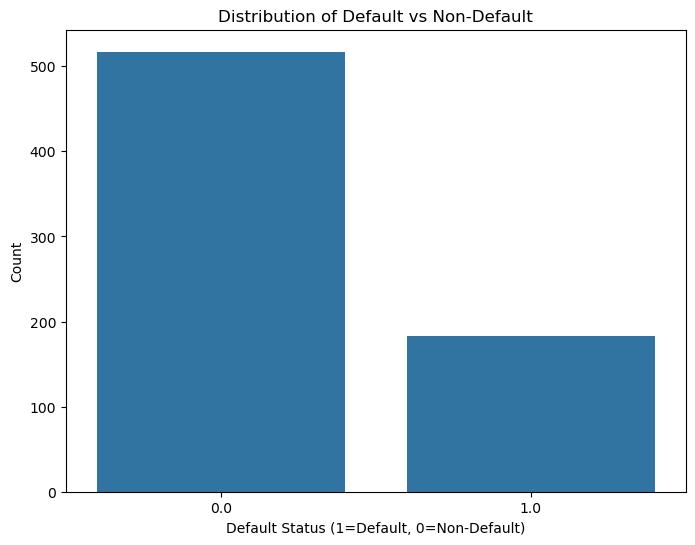

In [37]:
# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='default', data=df)
plt.title('Distribution of Default vs Non-Default')
plt.xlabel('Default Status (1=Default, 0=Non-Default)')
plt.ylabel('Count')

In [38]:
# Separate features and target variable
X = df.drop(['default'], axis=1)
y = df['default']

In [39]:
# Display feature names for reference
print("Features used for modeling:", X.columns.tolist())

Features used for modeling: ['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']


In [40]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 560 samples
Testing set size: 140 samples


SVM

In [41]:
# Standardize the features (important for SVM and Logistic Regression)
# Create a scaler object
scaler = StandardScaler()

In [ ]:
# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use transform only, not fit_transform

In [43]:
# MODEL 1: RANDOM FOREST
print("Training Random Forest model...")

Training Random Forest model...


In [ ]:
# Initialize Random Forest model with 200 trees
# n_estimators=200 may be computationally expensive, consider tuning this parameter
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

In [47]:
# Train the model
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [48]:
# Evaluate on test set
rf_test_accuracy = rf_model.score(X_test_scaled, y_test)
print(f"Random Forest Test Accuracy: {rf_test_accuracy:.4f}")



Random Forest Test Accuracy: 0.7929


In [ ]:
# Perform 10-fold cross-validation to get a more robust estimate of model performance
rf_cv_scores = cross_val_score(estimator=rf_model, X=X_train_scaled, y=y_train, cv=10)
print(f"Random Forest Cross-Validation Accuracy: {rf_cv_scores.mean():.4f} ± {rf_cv_scores.std():.4f}")

Random Forest Cross-Validation Accuracy: 0.7804 ± 0.0445


In [ ]:
# Get feature importances for interpretation
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

In [ ]:
print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
    Feature  Importance
5   debtinc    0.190091
2    employ    0.159954
6  creddebt    0.155266
7   othdebt    0.137216
4    income    0.113700
0       age    0.106425
3   address    0.094475
1        ed    0.042873


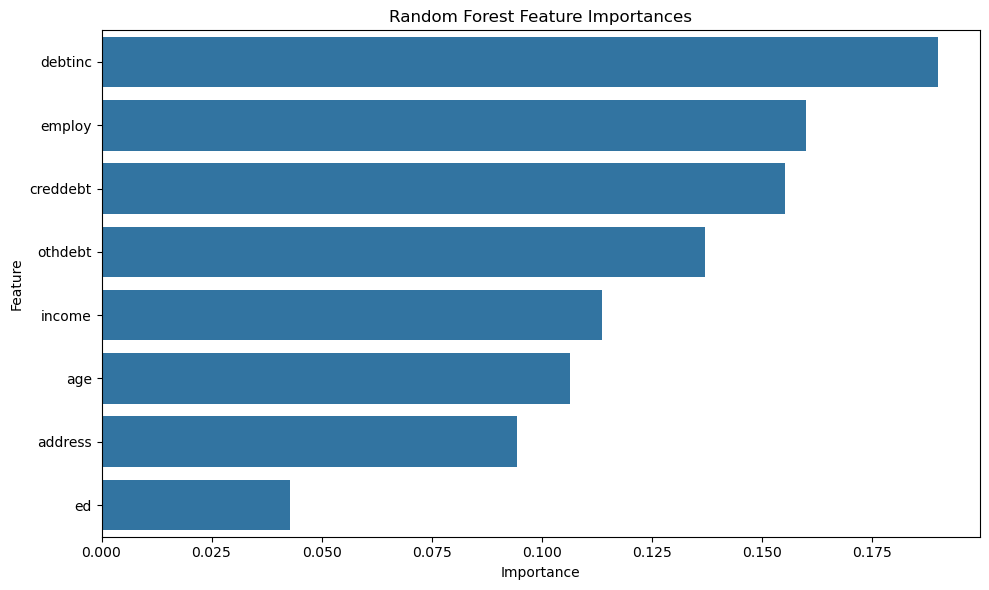

In [ ]:
# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Random Forest Feature Importances')
plt.tight_layout()

In [ ]:
# MODEL 2: SUPPORT VECTOR MACHINE
print("Training Support Vector Machine model...")

Training Support Vector Machine model...


In [ ]:
# Initialize SVM with default parameters
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [ ]:
# Evaluate on test set
svm_test_accuracy = svm_model.score(X_test_scaled, y_test)
print(f"SVM Test Accuracy: {svm_test_accuracy:.4f}")

SVM Test Accuracy: 0.8071


In [ ]:
# Hyperparameter tuning for SVM using Grid Search
# This is computationally expensive, consider reducing parameter space or using RandomizedSearchCV
print("Performing Grid Search for SVM hyperparameters...")
param_grid = {
    'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4.0, 7.0],
    'gamma': [0.1, 0.4, 0.8, 1.0, 2.0, 3.0],
    'kernel': ['rbf', 'linear']
}

Performing Grid Search for SVM hyperparameters...


In [57]:
svm_grid = GridSearchCV(
    SVC(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=10,
    verbose=1,
    n_jobs=-1  # Use all available cores
)


In [ ]:
# Fit grid search
svm_grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4.0, 7.0],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 2.0, 3.0],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy', verbose=1)

In [ ]:
# Display best parameters and score
print(f"Best SVM Parameters: {svm_grid.best_params_}")
print(f"Best SVM Cross-Validation Accuracy: {svm_grid.best_score_:.4f}")

Best SVM Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best SVM Cross-Validation Accuracy: 0.7929


In [ ]:
# Train SVM with best parameters
svm_optimized = SVC(
    C=svm_grid.best_params_['C'],
    gamma=svm_grid.best_params_['gamma'],
    kernel=svm_grid.best_params_['kernel'],
    random_state=42
)
svm_optimized.fit(X_train_scaled, y_train)

SVC(C=0.1, gamma=0.1, kernel='linear', random_state=42)

In [ ]:
# Evaluate optimized SVM on test set
svm_opt_test_accuracy = svm_optimized.score(X_test_scaled, y_test)
print(f"Optimized SVM Test Accuracy: {svm_opt_test_accuracy:.4f}")

Optimized SVM Test Accuracy: 0.8357


In [62]:
# MODEL 3: LOGISTIC REGRESSION
print("Training Logistic Regression model...")

# Initialize and train Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)  # Increase max_iter for convergence
lr_model.fit(X_train_scaled, y_train)

# Evaluate on test set
lr_test_accuracy = lr_model.score(X_test_scaled, y_test)
print(f"Logistic Regression Test Accuracy: {lr_test_accuracy:.4f}")

Training Logistic Regression model...
Logistic Regression Test Accuracy: 0.8571


In [63]:
# Make predictions on test set
y_pred = lr_model.predict(X_test_scaled)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

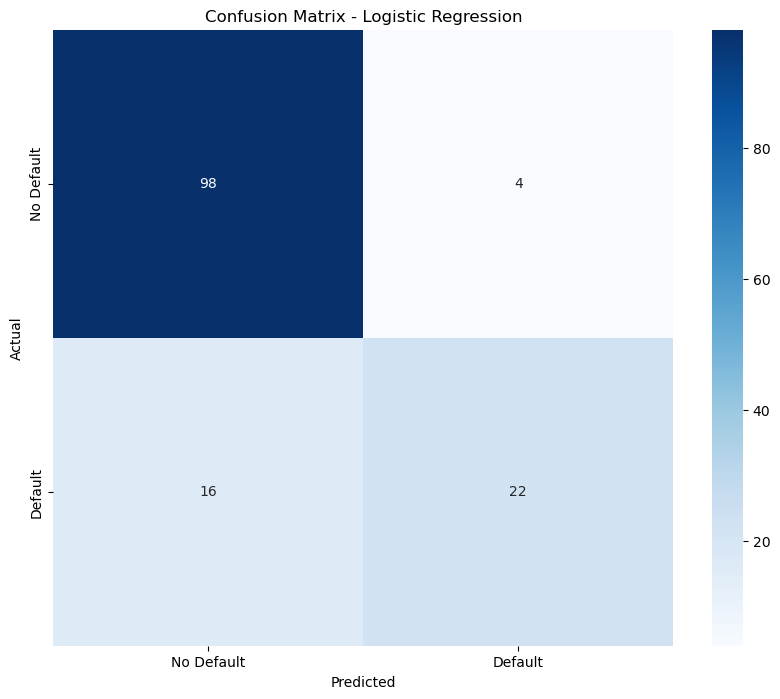

In [64]:
# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['No Default', 'Default'],
    yticklabels=['No Default', 'Default']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')

In [65]:
# Generate classification report for more detailed metrics
print("\nClassification Report - Logistic Regression:")
print(classification_report(y_test, y_pred))


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91       102
         1.0       0.85      0.58      0.69        38

    accuracy                           0.86       140
   macro avg       0.85      0.77      0.80       140
weighted avg       0.86      0.86      0.85       140



In [66]:
# Compare all models
models = {
    'Random Forest': rf_test_accuracy,
    'SVM (Default)': svm_test_accuracy,
    'SVM (Optimized)': svm_opt_test_accuracy,
    'Logistic Regression': lr_test_accuracy
}

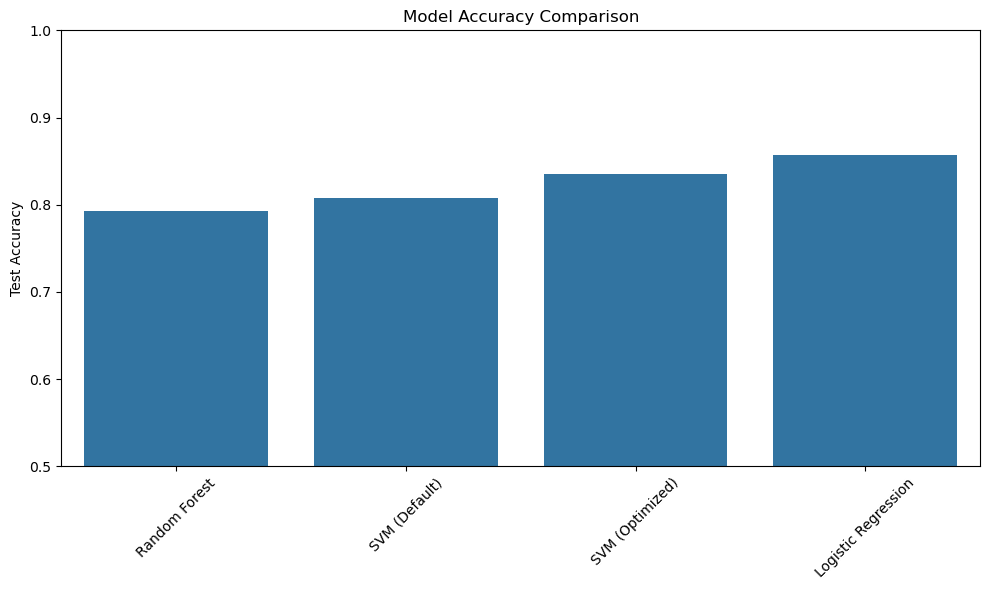

In [67]:
# Visualize model comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(models.keys()), y=list(models.values()))
plt.title('Model Accuracy Comparison')
plt.ylabel('Test Accuracy')
plt.ylim(0.5, 1.0)  # Set y-axis to start from 0.5 for better visualization
plt.xticks(rotation=45)
plt.tight_layout()

In [68]:
def predict_default_probability(customer_data, model=rf_model, scaler=scaler):
    """
    Predict the probability of default for new customer data.
    
    Parameters:
    -----------
    customer_data : DataFrame
        Customer information with the same features as the training data
    model : trained model object
        The model to use for prediction (default: Random Forest)
    scaler : StandardScaler object
        The scaler used to standardize the training data
        
    Returns:
    --------
    DataFrame with original data and default probabilities
    """
    # Ensure customer_data has the same features as X
    required_features = X.columns.tolist()
    missing_features = set(required_features) - set(customer_data.columns)
    
    if missing_features:
        raise ValueError(f"Customer data is missing required features: {missing_features}")
    
    # Scale the customer data
    customer_data_scaled = scaler.transform(customer_data[required_features])
    
    # Get probabilities (for models that support predict_proba)
    if hasattr(model, 'predict_proba'):
        probs = model.predict_proba(customer_data_scaled)
        default_probs = probs[:, 1]  # Probability of class 1 (default)
    else:
        # For models without predict_proba, use decision_function if available
        if hasattr(model, 'decision_function'):
            decision_scores = model.decision_function(customer_data_scaled)
            # Convert decision scores to pseudo-probabilities using sigmoid function
            default_probs = 1 / (1 + np.exp(-decision_scores))
        else:
            # Fallback to binary predictions
            predictions = model.predict(customer_data_scaled)
            default_probs = predictions
    
    # Add predictions to the customer data
    result = customer_data.copy()
    result['default_probability'] = default_probs
    
    return result


In [ ]:
# Example usage (uncomment to use)
# new_customers = pd.DataFrame({
#     'age': [35, 42, 28],
#     'income': [60000, 82000, 45000],
#     'debtinc': [15.2, 8.7, 23.4],
#     # Add all other required features
# })
# predictions = predict_default_probability(new_customers)
# print(predictions)
